In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.stats as stats
import networkx as nx
import json
import os
import pandas
import geopandas

In [34]:
#This loads the distance function from a json file
distance_file_path = "PA_vtds_10.json"

#### Load distance matrix
with open(distance_file_path, "r") as f:
    matrix = np.array(json.load(f))
    matrix_dimensions = matrix.shape
    print("Matrix dimensions:",matrix_dimensions)
    matrix_rows, matrix_columns = matrix_dimensions
    if matrix_rows > matrix_columns:
        N = matrix_rows
    else:
        N = matrix_columns

print(matrix)

Matrix dimensions: (8921, 10)
[[25. 36. 55. ... 25. 23. 32.]
 [24. 33. 52. ... 23. 20. 29.]
 [26. 33. 52. ... 24. 20. 29.]
 ...
 [39. 27. 41. ... 27. 20. 11.]
 [40. 27. 41. ... 28. 21. 11.]
 [40. 27. 41. ... 28. 21. 11.]]


Data headings:
Empty GeoDataFrame
Columns: [geometry]
Index: []
<GeometryArray>
[                  <POLYGON ((0 0, 0 1000, 1000 1000, 1000 0, 0 0))>,
          <POLYGON ((0 1000, 0 2000, 1000 2000, 1000 1000, 0 1000))>,
          <POLYGON ((0 2000, 0 3000, 1000 3000, 1000 2000, 0 2000))>,
          <POLYGON ((1000 0, 1000 1000, 2000 1000, 2000 0, 1000 0))>,
 <POLYGON ((1000 1000, 1000 2000, 2000 2000, 2000 1000, 1000 1000))>,
 <POLYGON ((1000 2000, 1000 3000, 2000 3000, 2000 2000, 1000 2000))>,
          <POLYGON ((2000 0, 2000 1000, 3000 1000, 3000 0, 2000 0))>,
 <POLYGON ((2000 1000, 2000 2000, 3000 2000, 3000 1000, 2000 1000))>,
 <POLYGON ((2000 2000, 2000 3000, 3000 3000, 3000 2000, 2000 2000))>]
Length: 9, dtype: geometry


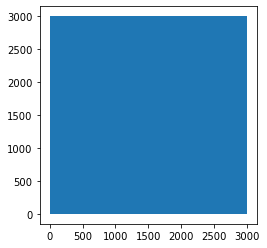

In [52]:
# Now load positions from state file
position_file_path = "simple_rectangle_shapefile.shp"
shx_filepath = position_file_path.replace(".shp", ".shx")
shx_filepath = shx_filepath.replace(".SHP", ".SHX")

if os.path.isfile(shx_filepath):
    #with open(position_file_path, "r") as f:
    #    position_matrix = np.array(json.load(f))
    df = geopandas.read_file(position_file_path)
else:
    if os.path.isfile(position_file_path):
        print("Unable to find", shx_filepath, "that needs to accompany" , position_file_path, ". Are you sure it's in this directory?")
    else:
        print("Unable to find", position_file_path, "and", shx_filepath, ". Are you sure they're in this directory?")
    print("Unable to proceed with loading positional data")
    exit(1)

# Now recreate position and weight graph
print('Data headings:')
print(df.head(0))

geometry = df['geometry'].values
print(geometry)
df.plot()
#geopdvisual(df)
#plt.draw(df)
plt.show()

Data headings:
Empty GeoDataFrame
Columns: [geometry]
Index: []


In [6]:
# The goal here is to display the graph for the corresponding shapefile (to-do)
matrix.resize(N, N)
matrix_dimensions = matrix.shape
print("Matrix dimensions (after reshaping to NxN):",matrix_dimensions)

try: # older versions of networkx
    G = nx.from_numpy_matrix(matrix)
except: # newer versions of networkx
    G = nx.from_numpy_array(matrix)

nx.draw_networkx_edges(G,pos=x)
nx.draw_networkx_nodes(G,pos=x, node_size = 100, node_color = dist[80], cmap = 'plasma')
plt.draw()